In [18]:
!python -m pip install scipy
!python -m pip install matplotlib
!python -m pip install sortedcontainers
!python -m pip install dataclasses
!python -m pip install statsmodels
!python -m pip install numpy

You should consider upgrading via the '/media/grosedj/e5490d4f-0dc1-4ce5-a9e9-217f2440bcdd/Dropbox/work/oss-env/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/grosedj/e5490d4f-0dc1-4ce5-a9e9-217f2440bcdd/Dropbox/work/oss-env/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/grosedj/e5490d4f-0dc1-4ce5-a9e9-217f2440bcdd/Dropbox/work/oss-env/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/grosedj/e5490d4f-0dc1-4ce5-a9e9-217f2440bcdd/Dropbox/work/oss-env/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/grosedj/e5490d4f-0dc1-4ce5-a9e9-217f2440bcdd/Dropbox/work/oss-env/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/grosedj/e5490d4f-0dc1-4ce5-a9e9-217f2440bcdd/Dropbox/work/oss-env/env/bin/python -m pip install --upgrade pip' command.


In [2]:
from sortedcontainers import SortedList

In [295]:
from collections import deque

In [4]:
import dataclasses

In [5]:
import unittest

In [6]:
@dataclasses.dataclass
class OSW :
    size : int
    OST : SortedList
    W : deque
    def __init__(self,size) :
        self.size = size
        self.OST = SortedList()
        self.W = deque([],size+1)
    def push(self,x) :
        self.W.append(x)
        popped = None
        if len(self.W) > self.size :
            self.OST.remove(self.W[0])
            popped = self.W.popleft()
        index = self.OST.bisect_left(x)
        self.OST.add(x)
        return (index,popped)
    def bisect_left(self,x) :
        if len(self.OST) == 0 :
            return (0,None)
        index = self.OST.bisect_left(x)
        if index == len(self.OST) :
            return (index,None)
        return (index,self.OST[index])
    def bisect_right(self,x) :
        if len(self.OST) == 0 :
            return (0,None)
        index = self.OST.bisect_right(x)
        if index == 0 :
            return (index,None)
        return (index,self.OST[index-1])
    def __getitem__(self,i) :
        return self.OST[i]
    def __len__(self) :
        return len(self.W)
        

  

In [7]:
from scipy.stats import median_abs_deviation
from math import floor,ceil


In [8]:
def mad(T) :
    if len(T) == 1 :
        return 0
    mu = (T[ceil(len(T)/2) - 1] + T[floor(len(T)/2)])/2
    a = 0
    b = floor(len(T)/2) - 1
    c = ceil(len(T)/2)
    d = len(T) - 1  
   
    def bisect(T,Ix,Iy,mu) :
        a,b = Ix
        c,d = Iy
        if b - a < 2 :
            if len(T) % 2 == 0 :
                return (max(mu-T[b],T[c]-mu) + min(mu-T[a],T[d]-mu))/2
            else :
                return min(max(mu-T[b],T[c]-mu),min(mu-T[a],T[d]-mu))
        (a,b) = (a + floor((b-a)/2), a + ceil((b-a)/2)) 
        (c,d) = (c + floor((d-c)/2), c + ceil((d-c)/2))
        if 4*mu > T[a] + T[b] + T[c] + T[d] :
            Ix = (a,Ix[1])
            Iy = (c,Iy[1])
        else :
            Ix = (Ix[0],b)
            Iy = (Iy[0],d)
        return bisect(T,Ix,Iy,mu)
    return bisect(T,(a,b),(c,d),mu)

In [9]:
from random import random

In [10]:
diff = []
for i in range(200) :
    osw = OSW(5001)
    X = [random() for j in range(5001)]
    for x in X :
        osw.push(x)
    diff.append(mad(osw)- median_abs_deviation(X))

diff = [d for d in diff if d != 0]

print(diff)

[]


In [11]:
class test_OSW(unittest.TestCase) :
    def test_push(self) :
        osw = OSW(4)
        X = [1,3,2,4,3,5,4,6,5,7]
        for x in X :
            osw.push(x)
        self.assertEqual(osw.OST,[4,5,6,7])
    def test_index(self) :
        osw = OSW(4)
        X = [1,3,2,4,3,5,4,6,5,7]
        for x in X :
            osw.push(x)
        self.assertEqual(osw.__getitem__(2),6)
    def test_index_out_of_bounds(self) :
        osw = OSW(4)
        self.assertRaises(IndexError,osw.__getitem__,0)
        osw.push(1)
        self.assertEqual(osw.__getitem__(0),1)
        X = [1,3,2,4,3,5,4,6,5,7]
        for x in X :
            osw.push(x)
        self.assertRaises(IndexError,osw.__getitem__,4)
    def test_bisect_left(self) :
        osw = OSW(4)
        (index,upperbound) = osw.bisect_left(3.14)
        self.assertEqual(index,0)
        self.assertIsNone(upperbound)
        self.assertEqual(osw.OST,[])
        osw.push(3.14)
        (index,upperbound) = osw.bisect_left(2.14)
        self.assertEqual(index,0)
        self.assertEqual(upperbound,3.14)
        self.assertEqual(osw.OST,[3.14])
        (index,upperbound) = osw.bisect_left(4.14)
        self.assertEqual(index,1)
        self.assertIsNone(upperbound)
        self.assertEqual(osw.OST,[3.14])
        (index,upperbound) = osw.bisect_left(3.14)
        self.assertEqual(index,0)
        self.assertEqual(upperbound,3.14)
        self.assertEqual(osw.OST,[3.14])
        osw.push(5.14)
        self.assertEqual(osw.OST,[3.14,5.14])
        (index,upperbound) = osw.bisect_left(4.14)
        self.assertEqual(index,1)
        self.assertEqual(upperbound,5.14)
        osw.push(5.14)
        self.assertEqual(osw.OST,[3.14,5.14,5.14])
        (index,upperbound) = osw.bisect_left(5.14)
        self.assertEqual(index,1)
        self.assertEqual(upperbound,5.14)
    def test_len(self) :
        osw = OSW(4)
        self.assertEqual(len(osw),0)
        osw.push(1.14)
        self.assertEqual(len(osw),1)
        osw.push(2.14)
        self.assertEqual(len(osw),2)
        osw.push(3.14)
        self.assertEqual(len(osw),3)
        osw.push(4.14)
        self.assertEqual(len(osw),4)
        osw.push(5.14)
        self.assertEqual(len(osw),4)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_bisect_left (__main__.test_OSW) ... ok
test_index (__main__.test_OSW) ... ok
test_index_out_of_bounds (__main__.test_OSW) ... ok
test_len (__main__.test_OSW) ... ok
test_push (__main__.test_OSW) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


In [12]:
osw = OSW(10)
for i in range(101010) :
    osw.push(random())
print(osw)
index,upper_bound = osw.bisect_left(2.1)
print(index)
print(upper_bound)

OSW(size=10, OST=SortedList([0.011808695109316925, 0.11912141410459798, 0.13448304778451314, 0.30345934709614264, 0.3382658843328781, 0.42695561625411116, 0.6212996593078272, 0.85342579416227, 0.8650095434112905, 0.960629444620492]), W=deque([0.3382658843328781, 0.960629444620492, 0.6212996593078272, 0.11912141410459798, 0.85342579416227, 0.011808695109316925, 0.30345934709614264, 0.8650095434112905, 0.42695561625411116, 0.13448304778451314], maxlen=11))
10
None


In [13]:
@dataclasses.dataclass
class kruskall_wallis_sample :
    osw : None
    S : int = 0
    def __init__(self,sample_size) :
        self.osw = OSW(sample_size)


@dataclasses.dataclass
class kruskall_wallis_statistic :
    samples : None
    H : float = 0.0
    def __init__(self,number_of_samples,sample_size) :
        self.samples = []
        for i in range(number_of_samples) :
            self.samples.append(kruskall_wallis_sample(sample_size))
    def push(self,sample_number,value) :
        rank = 1
        for sample in self.samples :
            index,_ = sample.osw.bisect_left(value)
            rank += index
            sample.S = sample.S + len(sample.osw.W) - index
        self.samples[sample_number].S += rank
        _,popped = self.samples[sample_number].osw.push(value)
        if popped != None :
            rank = 1
            for sample in self.samples :
                index,_ = sample.osw.bisect_left(popped)
                rank += index
                sample.S = sample.S - len(sample.osw.W) + index
            self.samples[sample_number].S -= rank
        N = sum([len(sample.osw.W) for sample in self.samples])
        R = sum([0 if sample.S == 0 else sample.S*sample.S/len(sample.osw.W) for sample in self.samples])
        self.H = (12/N/(N+1))*R - 3*(N+1)
        
            
        
        


In [14]:
from scipy import stats

kw = kruskall_wallis_statistic(2,1000)

for i in range(10000) :
    kw.push(0,random()+0.2) 
    kw.push(1,random()) 
   
print(kw.samples[0].S)
print(kw.samples[1].S)
print(kw.samples[0].S + kw.samples[1].S)
print(kw.H)
stats.kruskal(kw.samples[0].osw.OST,kw.samples[1].osw.OST)

1169924
831076
2001000
172.14088021589305


KruskalResult(statistic=172.14088021589214, pvalue=2.5211204078508854e-39)

In [15]:

x=[]
print(sum(x))

0


In [16]:
@dataclasses.dataclass
class kruskall_wallis_sample :
    osw : None
    S : int = 0
    def __init__(self,sample_size) :
        self.osw = OSW(sample_size)


@dataclasses.dataclass
class kruskall_wallis_statistic :
    samples : None
    H : float = 0.0
    def __init__(self,window_sizes) :
        self.samples = []
        for window_size in window_sizes :
            self.samples.append(kruskall_wallis_sample(window_size))
    def push(self,sample_number,value) :
        rank = 1
        for sample in self.samples :
            index,_ = sample.osw.bisect_left(value)
            rank += index
            sample.S = sample.S + len(sample.osw.W) - index
        self.samples[sample_number].S += rank
        _,popped = self.samples[sample_number].osw.push(value)
        if popped != None :
            rank = 1
            for sample in self.samples :
                index,_ = sample.osw.bisect_left(popped)
                rank += index
                sample.S = sample.S - len(sample.osw.W) + index
            self.samples[sample_number].S -= rank
        N = sum([len(sample.osw.W) for sample in self.samples])
        R = sum([0 if sample.S == 0 else sample.S*sample.S/len(sample.osw.W) for sample in self.samples])
        self.H = (12/N/(N+1))*R - 3*(N+1)

In [19]:
import numpy as np
kw = kruskall_wallis_statistic([10000,1000])

H = []
X = list(np.random.poisson(1,50000)) + list(np.random.poisson(5,50000))
for x in X :
    kw.push(0,x) 
    kw.push(1,x)
    H.append(kw.H)
   
print(kw.samples[0].S)
print(kw.samples[1].S)
print(kw.samples[0].S + kw.samples[1].S)
print(kw.H)
stats.kruskal(kw.samples[0].osw.OST,kw.samples[1].osw.OST)
# note - this is broken wrt to true KSW stat since it has lots of repeated values (poisson distribution)
# note - this corresponds to a 1 second window size at 10000 Hz !! - and its pure python !!!

52134325
8371175
60505500
898.9119122579796


KruskalResult(statistic=0.3014987401248039, pvalue=0.582944367383025)

In [20]:
import matplotlib.pyplot as plt

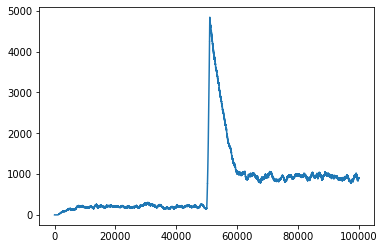

In [21]:
plt.plot(H)

In [22]:
kw = kruskall_wallis_statistic([10000,1000])

H = []
X = list(np.random.normal(0,1,50000)) + list(np.random.normal(1,1,50000))
for x in X :
    kw.push(0,x) 
    kw.push(1,x)
    H.append(kw.H)
   
print(kw.samples[0].S)
print(kw.samples[1].S)
print(kw.samples[0].S + kw.samples[1].S)
print(kw.H)
stats.kruskal(kw.samples[0].osw.OST,kw.samples[1].osw.OST)
# note - this is less broken wrt to true KSW stat since it has less repeated values (normal distribution)
# note - this corresponds to a 1 second window size at 10000 Hz !! - and its pure python !!!

55045811
5459689
60505500
0.18167850788449869


KruskalResult(statistic=0.17725407453559056, pvalue=0.6737437433144426)

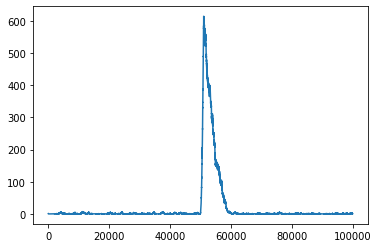

In [23]:
plt.plot(H)

In [24]:

# try a sign test
from scipy.stats import binom
import statsmodels

l = OSW(1000)
s = OSW(100)

R = []
P = []
# X = list(np.random.normal(0,1,50000)) + list(np.random.normal(5,1,50000))
X = list(np.random.poisson(1,50000)) + list(np.random.poisson(2,50000))
for x in X :
    l.push(x) 
    s.push(x)
    mu = (l[ceil(len(l)/2) - 1] + l[floor(len(l)/2)])/2
    below,_ = s.bisect_left(mu)
    above,_ = s.bisect_right(mu)
    above = len(s) - above
    x = min(above,below)
    R.append(above+below)
    P.append(binom.pmf(x,above + below, 0.5))

    



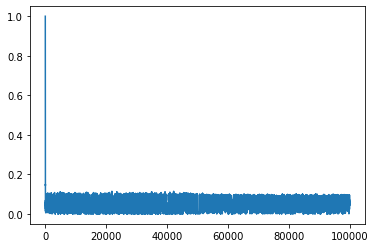

In [25]:
plt.plot(P)

In [26]:
window = OSW(10)
print(window.bisect_left(2))
print(window.bisect_right(2))
window.push(1)
window.push(2)
window.push(2)
window.push(2)
window.push(2)
window.push(3)
window.push(4)

print(window.bisect_left(2))
print(window.bisect_right(2))

(0, None)
(0, None)
(1, 2)
(5, 2)


In [107]:
min(5,5)

5

In [231]:
@dataclasses.dataclass
class ost :
    X : SortedList
    def __init__(self) :
        self.X = SortedList()
    def bisect_left(self,x) :
        if len(self.X) == 0 :
            return (1,None)
        index = self.X.bisect_left(x)
        if index == len(self.X) :
            return (index+1,None)
        return (index+1,self.X[index])
    def bisect_right(self,x) :
        if len(self.X) == 0 :
            return (1,None)
        index = self.X.bisect_right(x)
        if index == 0 :
            return (1,None)
        return (index+1,self.X[index-1])
    def add(self,x) :
        self.X.add(x)
    def remove(self,x) :
        if len(self.X) != 0 :
            _,ub = self.bisect_left(x)
            if ub == x :
                self.X.remove(x)
    def __len__(self) :
        return len(self.X)
    

In [287]:
@dataclasses.dataclass
class kw :
    X1 : ost
    X2 : ost
    S1 : float
    S2 : float
    T : float
    def __init__(self) :
        self.X1 = ost()
        self.X2 = ost()
        self.S1 = self.S2 = self.T = 0.0
        
    def add(self,x,k) :
        def add_impl(X,Y,Sx,Sy,T) :
            lbx,_ = X.bisect_left(x)
            lby,_ = Y.bisect_left(x)
            rbx,_ = X.bisect_right(x)
            rby,_ = Y.bisect_right(x)
            Sx = Sx + len(X) + 0.5*(lby + rby)
            Sy = Sy + len(Y) - 0.5*(lby + rby) + 1
            t = 1 + rbx + rby - lbx - lby
            T = T + 3*t*(t - 1)
            X.add(x)
            return(X,Y,Sx,Sy,T)
        if k == 1 :
            self.X1,self.X2,self.S1,self.S2,self.T = add_impl(self.X1,self.X2,self.S1,self.S2,self.T)
        if k == 2 :
            self.X2,self.X1,self.S2,self.S1,self.T = add_impl(self.X2,self.X1,self.S2,self.S1,self.T)
    def remove(self,x,k) :
        def remove_impl(X,Y,Sx,Sy,T) :
            if len(X) != 0 :
                X.remove(x)
                lbx,_ = X.bisect_left(x)
                lby,_ = Y.bisect_left(x)
                rbx,_ = X.bisect_right(x)
                rby,_ = Y.bisect_right(x)
                Sx = Sx - len(X) - 0.5*(lby + rby)
                Sy = Sy - len(Y) + 0.5*(lby + rby) - 1
                t = 1 + rbx + rby - lbx - lby
                T = T - 3*t*(t - 1)
                return(X,Y,Sx,Sy,T)
        if k == 1 :
            self.X1,self.X2,self.S1,self.S2,self.T = remove_impl(self.X1,self.X2,self.S1,self.S2,self.T)
        if k == 2 :
            self.X2,self.X1,self.S2,self.S1,self.T = remove_impl(self.X2,self.X1,self.S2,self.S1,self.T)    
    def H(self) :
        N1 = len(self.X1)
        N2 = len(self.X2)
        N = N1 + N2
        H = 12*((self.S1*self.S1/N1) + (self.S2*self.S2/N2))/(N*(N+1)) - 3*(N+1)
        C = 1.0 - self.T/(N*N*N - N)
        return H / C
    def pvalue(self) :
        return stats.chi2.sf(self.H(),1)


In [288]:
blob = kw()
blob.add(1,1)
blob.add(2,1)
blob.add(3,1)
print(blob)
blob.add(4,2)
blob.add(5,2)
blob.add(6,2)
print(blob)
print(blob.H())
blob.add(1,2)
print(blob)
print(blob.H())

kw(X1=ost(X=SortedList([1, 2, 3])), X2=ost(X=SortedList([])), S1=6.0, S2=0.0, T=0.0)
kw(X1=ost(X=SortedList([1, 2, 3])), X2=ost(X=SortedList([4, 5, 6])), S1=6.0, S2=15.0, T=0.0)
3.8571428571428577
kw(X1=ost(X=SortedList([1, 2, 3])), X2=ost(X=SortedList([1, 4, 5, 6])), S1=8.5, S2=19.5, T=6.0)
1.559090909090909


In [257]:
blob = ost()
print(blob.bisect_left(3))
print(blob.bisect_right(3))
blob.add(3)
print(blob.bisect_left(4))

(1, None)
(1, None)
(2, None)


In [258]:
stats.kruskal([1,2,3],[4,5,6,1])

KruskalResult(statistic=1.5590909090909055, pvalue=0.2117983783057198)

In [293]:
blob = kw()
#X = list(np.random.poisson(1,100000))
#Y = list(np.random.poisson(1,100000))
X = [1,2,3]
Y = [4,5,6]
for x in X :
    blob.add(x,1)
for y in Y :
    blob.add(y,2)

print(blob)
print(blob.H())
print(blob.pvalue())
print(stats.kruskal(X,Y))
stats.chi2.sf(stats.kruskal(X,Y).statistic,1)

blob.add(10,2)
print(blob)
print(blob.H())
print(blob.pvalue())
print(stats.kruskal(X,Y))
stats.chi2.sf(stats.kruskal(X,Y).statistic,1)


blob.remove(10,2)
print(blob)
print(blob.H())
print(blob.pvalue())
print(stats.kruskal(X,Y))
stats.chi2.sf(stats.kruskal(X,Y).statistic,1)


kw(X1=ost(X=SortedList([1, 2, 3])), X2=ost(X=SortedList([4, 5, 6])), S1=6.0, S2=15.0, T=0.0)
3.8571428571428577
0.04953461343562649
KruskalResult(statistic=3.857142857142854, pvalue=0.049534613435626915)
kw(X1=ost(X=SortedList([1, 2, 3])), X2=ost(X=SortedList([4, 5, 6, 10])), S1=6.0, S2=22.0, T=0.0)
4.5
0.033894853524689295
KruskalResult(statistic=3.857142857142854, pvalue=0.049534613435626915)
kw(X1=ost(X=SortedList([1, 2, 3])), X2=ost(X=SortedList([4, 5, 6])), S1=6.0, S2=15.0, T=0.0)
3.8571428571428577
0.04953461343562649
KruskalResult(statistic=3.857142857142854, pvalue=0.049534613435626915)


0.049534613435626915

In [274]:
for x in X[:50000] :
    blob.remove(x,1)

print(blob.H())
print(blob.pvalue())
print(stats.kruskal(X[50001:],Y))
stats.chi2.sf(stats.kruskal(X[50001:],Y).statistic,1)
    

0.10191240332886305
0.7495466340569163
KruskalResult(statistic=0.09922993633531674, pvalue=0.7527557047579259)


0.7527557047579259

In [226]:
L = kw()
R = kw()

# X = list(np.random.poisson(1,10000)) + list(np.random.poisson(1,10000))
X = list(np.random.normal(0,1,10000)) + list(np.random.normal(5,1,10000))
for x in X :
    L.add(x,1)
    R.add(x,1)
pL = []    
for x in X[1:] :
    L.add(x,2)
    pL.append(L.pvalue())
    
pR = []
X.reverse()
for x in X[1:] :
    R.add(x,2)
    pR.append(R.pvalue())




In [305]:
from math import log
p = [log(pl) + log(pr) for pl,pr in zip(pL,pR)]
print(2*log(len(X)))

ValueError: math domain error

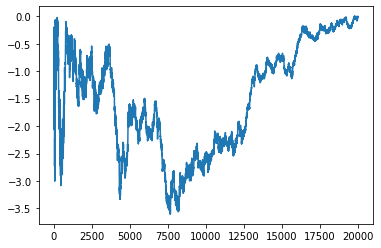

In [223]:
plt.plot(p)

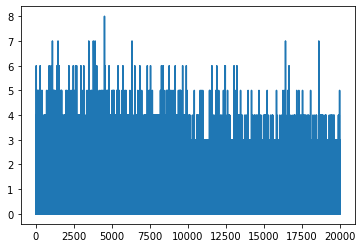

In [220]:
plt.plot(X)

In [230]:
Z = SortedList()
Z.add(1)
Z.add(3)
Z.add(4)
Z.remove(4.1)
Z

ValueError: 4.1 not in list

In [442]:
Z = list(np.random.poisson(1,50000)) + list(np.random.poisson(1.5,50000))


lw = 1000
rw = 100
cpt = list()
L = kw()
R = kw()
LD = deque(maxlen=lw)
RD = deque(maxlen=rw)

for x in Z[:(lw+rw)] :
    L.add(x,1)
    R.add(x,1)
    R.add(x,2)
    if len(RD) == rw :
        v = RD.popleft()
        R.remove(v,2)
        L.add(v,2)
        LD.append(v)
    RD.append(x)
    if len(LD) == lw :
        v = LD.popleft()
        R.remove(v,1)
        L.remove(v,1)
        L.remove(v,2)

p = list()    
for x in Z[(lw+rw+1):] :
    L.add(x,1)
    R.add(x,1)
    R.add(x,2)
    if len(RD) == rw :
        v = RD.popleft()
        R.remove(v,2)
        L.add(v,2)
        LD.append(v)
    RD.append(x)
    if len(LD) == lw  :
        v = LD.popleft()
        R.remove(v,1)
        L.remove(v,1)
        L.remove(v,2)
    p.append(log(L.pvalue())+log(R.pvalue()))


        
        

        

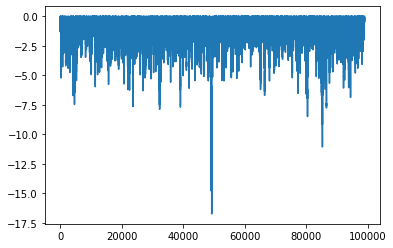

In [443]:
plt.plot(p)

In [440]:
len(L.X1)

1099

In [429]:
print(2*log(1100))

14.006130917572923
